Here you can find my solutions for the questions from BSPP exam. My submission consists of Jupyter notebook with saved outputs. I decided to use this way of submission because here are a lot of code blocks and helpful visualizations. However, the detailed text descriptions, comments, and Latex formulas are also included, and everything is structured in the easy-to-navigate way.

## Imports

In [1]:
import math
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import scipy
from scipy.stats import norm, uniform

# Additional settings

The provided solution includes interactive figures for the better analysis. To go through presaved notebook, all plots were rendered as svg files. To run the solution in the Jupyter notebook, ignore the next lines. I used svg to create nicely presaved variant.

In [ ]:
!pip install kaleido

In [3]:
import plotly.io as pio
pio.renderers.default = "svg"
# pio.renderers.default = "colab"

# Question 1

## a)

### (i)

We can calculate the posterior distribution with the help of the Bayes' theorem:
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

The likelihood is the probability of seeing bus 101 given the value of B, this is described by the uniform distributin with p=1/B. In our case we have equal probability of seeing any of 101 buses. 

Posterior distribution for our case will be:

$$\text{posterior}(B) = \frac{\frac{1}{B} \frac{1}{50} \left( \frac{49}{50} \right)^{B-1}}{\sum_{B=101}^{\infty} \frac{1}{B}  \frac{1}{50}  \left( \frac{49}{50} \right)^{B-1}}$$


In the formula above the sum in the denominator is calculated from 101 to $\infty$ because based on the observed number we are sure that number of busses wil be at least 101.

Denominator will be a constant Z (from the hint), but we can calculate it directly. 
$\sum_{B=101}^{\infty} \frac{1}{B}  \frac{1}{50}  \left( \frac{49}{50} \right)^{B-1} = \sum_{B=101}^{\infty} \frac{1}{B}  \frac{1}{50}  \left( \frac{49}{50} \right)^{B} \left( \frac{49}{50} \right)^{-1} = \sum_{B=101}^{\infty} \frac{1}{B}  \frac{1}{49}  \left( \frac{49}{50} \right)^{B} = \frac{1}{49} \sum_{B=101}^{\infty} \frac{1}{B} \left( \frac{49}{50} \right)^{B} = \frac{1}{49} \sum_{B=101}^{\infty} \frac{\left( \frac{49}{50} \right)^{B}}{B}$ 

We can represent the last sum above as:

$\frac{1}{49} \sum_{B=101}^{\infty} \frac{\left( \frac{49}{50} \right)^{B}}{B} = \color{red}{ \frac{1}{49} \sum_{B=1}^{\infty} \frac{\left( \frac{49}{50} \right)^{B}}{B}} - \frac{1}{49} \sum_{B=1}^{101} \frac{\left( \frac{49}{50} \right)^{B}}{B}$

Red sum is the Taylor series for $-ln(1-1/50)$ and we are able to replace it:

$\color{red}{\frac{1}{49} \sum_{B=1}^{\infty} \frac{\left( \frac{49}{50} \right)^{B}}{B}} = \frac{1}{49} \left(-ln(1-\frac{49}{50})\right) = \frac{1}{49} \left(-ln(\frac{1}{50})\right) = \frac{ln(50)}{49}$


With the above calculations we will have:

$Z = \sum_{B=101}^{\infty} \frac{1}{B}  \frac{1}{50}  \left( \frac{49}{50} \right)^{B-1} = \frac{ln(50)}{49} - \frac{1}{49} \sum_{B=1}^{101} \frac{\left( \frac{49}{50} \right)^{B}}{B} \approx 0.00096$ 

We can check it with the simple Python code:

In [4]:
def series_element(b):
  return (1/b) * (1/50) * (49/50)**(b-1)

series_sum = 0
for i in range(101, 1000000):  # approximation to 1000000 elements
  series_sum += series_element(i)

print("series sum =", series_sum)
Z = series_sum

series sum = 0.0009569326355274057


In [5]:
def posterior(b):
  return series_element(b) / Z

### (ii)

To calculate the mean and variance of the posterior distribution we can use the following formulas:

$mean = \sum_{B=101}^{\infty}(B * posterior(B))$

$variance = \mathbb{E}(B^2) - \mathbb{E}^2(B)$


For mean:

$\sum_{B=101}^{\infty}(B * posterior(B)) = \frac{1}{Z} \sum_{B=101}^{\infty}B \frac{1}{B}  \frac{1}{50}  \left( \frac{49}{50} \right)^{B-1} = \frac{1}{Z} \sum_{B=101}^{\infty} \frac{1}{50}  \left( \frac{49}{50} \right)^{B} \left( \frac{49}{50} \right)^{-1} =  \frac{1}{49 Z} \sum_{B=101}^{\infty} \left( \frac{49}{50} \right)^{B}$

Here we can recognize the infinite geometric series $\sum_{B=101}^{\infty} \left( \frac{49}{50} \right)^{B}$. The sum is calculated with the formula $\frac{a_1}{1-r}$ where $a_1$ is the first element and $r=\frac{a_2}{a_1}$. 

In our case, we have $a_1=\left(\frac{49}{50}\right)^{101}$ and $r = \frac{49}{50}$, so:

 $\sum_{B=101}^{\infty} \left( \frac{49}{50} \right)^{B} = \frac{\left(\frac{49}{50}\right)^{101}}{1-\frac{49}{50}} ≈ 6.4984$.

 $mean =  \frac{1}{49 Z} \sum_{B=101}^{\infty} \left( \frac{49}{50} \right)^{B} ≈ 138.5882$

In [6]:
posterior_mean = (49/50)**101 / (1 - 49/50) / (49*Z)
print("Analytical result of posterior mean calculation: ", posterior_mean)

Analytical result of posterior mean calculation:  138.58818371437465


In [7]:
posterior_mean = 0
for i in range(101, 1000000):  # approximation to 1000000 elements
  posterior_mean += i * posterior(i)

print("Numerical approximation for 1000000 elements of posterior mean =", posterior_mean)

Numerical approximation for 1000000 elements of posterior mean = 138.58818371437488


For the variance we need to calculate two terms $\mathbb{E}(B^2)$ and $\mathbb{E}^2(B)$. Expectation $\mathbb{E}$ is given by the mean that has already been calculated. 

$\mathbb{E}(B^2) = \sum_{B=101}^{\infty}(B^2 * posterior(B)) = \frac{1}{Z} \sum_{B=101}^{\infty}B^2 \frac{1}{B}  \frac{1}{50}  \left( \frac{49}{50} \right)^{B-1} = \frac{1}{Z} \frac{1}{50} \sum_{B=101}^{\infty}B \left( \frac{49}{50} \right)^{B-1}$

$\sum_{B=101}^{\infty}B \left( \frac{49}{50} \right)^{B-1} = \color{red}{\sum_{B=1}^{\infty}B \left( \frac{49}{50} \right)^{B-1}} - \sum_{B=1}^{101}B \left( \frac{49}{50} \right)^{B-1}$

Red sum is the Taylor series expansion for the function $\frac{1}{(1-x^2)}$, where $x = \frac{49}{50}$ in our case.

$\color{red}{\sum_{B=1}^{\infty}B \left( \frac{49}{50} \right)^{B-1}} = \frac{1}{(1-(\frac{49}{50})^2)} ≈ 2499.9999$

With the replacement above, we can easily compute $\mathbb{E}(B^2)$:

$\mathbb{E}(B^2) = \frac{1}{Z} \frac{1}{50} \left( \color{red}{\sum_{B=1}^{\infty}B \left( \frac{49}{50} \right)^{B-1}} - \sum_{B=1}^{101}B \left( \frac{49}{50} \right)^{B-1} \right) = \frac{1}{Z} \frac{1}{50}(2499.9999 - 1505.3533) ≈ 20788.2276$

In [8]:
s_1_inf = 1 / (1-49/50)**2

s_1_101 = 0
for i in range(1, 101):
  s_1_101 += i * (49/50)**(i-1)

Second element $\mathbb{E}^2(B)$ will be just a previously calculated mean value raised to the power of 2.

To cimpute standard deviation, we use the formula $std = \sqrt{variance}$.

In [9]:
var = (s_1_inf - s_1_101) / (50*Z) - posterior_mean**2
print("Analytically computed variance =", var)
print("Analytically computed standard deviation =", np.sqrt(var))

Analytically computed variance = 1581.5428919068618
Analytically computed standard deviation = 39.768616922227274


In [10]:
posterior_var = 0
for i in range(101, 1000000):  
  posterior_var += i**2 * posterior(i)

print("Numerical approximation for 1000000 elements of posterior variance =", posterior_var-posterior_mean**2)
print("Numerical approximation for 1000000 elements of posterior standard deviation =", np.sqrt(posterior_var-posterior_mean**2))

Numerical approximation for 1000000 elements of posterior variance = 1581.5428919068108
Numerical approximation for 1000000 elements of posterior standard deviation = 39.768616922226634


Here is another check of variance calculation with the formula:

$variance = \sum_{B=101}^{∞}((B_i - mean)^2 * posterior(B_i)$

In [11]:
posterior_var = 0
for i in range(101, 1000000):  # approximation to 1000000 elements
  posterior_var += (i-posterior_mean)**2 * posterior(i)

print("Numerical approximation for 1000000 elements of posterior variance =", posterior_var)
print("Numerical approximation for 1000000 elements of posterior standard deviation =", np.sqrt(posterior_var))

Numerical approximation for 1000000 elements of posterior variance = 1581.5428919069848
Numerical approximation for 1000000 elements of posterior standard deviation = 39.76861692222882


**Answer:** mean≈138.59, standard deviation≈39.77

## b)

### (i)

The initialization distribution should be chosen such that it is easy to sample from, has a broad support over the state space Z and it should be similar to the target distribution $\pi(k)$.

A common option we could choose as the initialization distribution is Gaussian centered at 0, with a standard deviation of 1. It is easy to sample from and has a similar shape to the target distribution $\pi(k)$, which is also centered around 0 and has long tails. However, it is designed for continuous values, so maybe there is a better candidate.

Another common option is a uniform distribution over the state space Zm it works with discrete values as wanted. This would ensure that the initialization distribution has a broad support over the state space, and it is easy to sample from a uniform distribution. Its drawback is that its shape is completely different from tre form of our target distribution $\pi(k)$.

Thus, for our specific case, I propose to choose the distribution with PDF of the following form:

$ f(x) = \frac{1}{3} \frac{1}{2^{|x|}}$

This is a correct probability distribution, all probabilities sum up to 1, it is symmetric, centered at 0, has long tails, works with discrete values, has a broad support over values of $Z$. In this way it should be a good choice for th initialization distribution. Check the sum and visualization below:


Sum of all probabilities of the initial distribution is: 0.9999999999999998


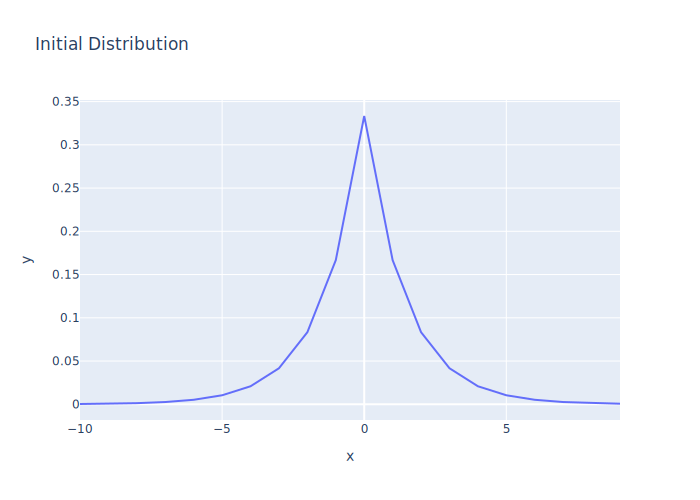

In [12]:
def init_dist(k, mean=0):
  return 1/(3*(2**abs(k-mean)))

init_dist_sum = 0
for i in range(-100, 100):
  init_dist_sum += init_dist(i)

print("Sum of all probabilities of the initial distribution is:", init_dist_sum)


x = np.arange(-10,10, 1)
y = init_dist(x)
px.line(x = x, y= y, title="Initial Distribution")

Sum of all probabilitie has to be 1 but with the floating operations we receive $\approx 0.999$. We handle this in the next function to force the sum to be equal exactly to $1$.

In [13]:
def sample_init_dist(mean=0, range_len=50):
  # utility function to sample from the proposed initialization distribution
  init_range = np.arange(mean-range_len//2, mean+range_len//2)
  init_probs = [init_dist(k, mean) for k in init_range]
  init_probs[len(init_probs)//2] += 1 - np.array(init_probs).sum()
  return np.random.choice(init_range, p=init_probs)

sample_init_dist()

0

### (ii)

To derive the acceptance probability for the Metropolis-Hastings algorithm using a random walk as the proposal distribution, we need to consider the transition probabilities for moving from one state to another. Let's say that we are currently at state $k_i$, and we propose to move to state $k_j$. The transition probability from $k_i$ to $k_j$ is given by the proposal distribution $q(k_j|k_i)$, which in this case is the probability of moving from $k_i$ to $k_j$ in a random walk. A random walk proposal distribution would produce proposed states with the means that are the current state plus some random offset.

To calculate the acceptance probability we need to perform the following steps:
1. Select the current state of the Markov chain, $k_i$.
2. Propose a new state, $k_j$, using a random walk, which means sampling from a distribution q($k_j$|$k_i$) that depends on the current state $k_i$.
3. Calculate the acceptance probability $\alpha$.

The expression for the acceptance probability can be used to determine whether to accept or reject the proposed state $k_j$ in the Metropolis-Hastings algorithm.

With those terms we derive:

$\alpha =  \min \left(1, \frac{\pi(k_j) q(k_i|k_j)}{(\pi(k_i) q(k_j|k_i)} \right)$,

where $\pi(k_i)$ and $\pi(k_j)$ are the probabilities of the current and proposed states from the target distribution $\pi(k)$.

Since $q(k_i|k_j) = q(k_j|k_i)$ in a symmetric random walk, the acceptance probability simplifies to:

$\alpha = \min(1, \frac{\pi(k_j)}{\pi(k_i)})$

Substituting the above with the expressions for $\pi(k)$, we get:

$\alpha = \min(1, \frac{\left(k_j-\frac{1}{2}\right)^4 e^{-3|k_j|} cos^{2}(k_j)}{\left(k_i-\frac{1}{2}\right)^4 e^{-3|k_i|} cos^{2}(k_i)})$

Conctant $c$ was cancelled out.

### (iii)

At first let's describe the steps of the algorithm:

1. Initialize the current state $k_i$ ($i=0$ here) to a sample from the initialization distribution.
2. Generate a proposal state $k_j$ from a proposal distribution $q(k_j | k_i)$. The proposal distribution should be chosen such that it is easy to sample from and has a broad support over the state space.
3. Calculate the acceptance probability $\alpha = \pi(k_j) / \pi(k_i)$.
4. Generate a uniform random number $u$ between 0 and 1.
5. If $u \lt \alpha$, set the current state $k_i$ to $k_j$. Otherwise, keep the current state $k_i$ unchanged.
6. Repeat steps 2-5 for a **num_samples** number of iterations. The samples drawn at each iteration can be used to estimate the target distribution $\pi(k)$.


Here is a pseudocode for this:



```
def metropolis_hastings(target_distribution, proposal_distribution, initial_state, num_samples):
  # Initialize the current state and the list of samples
  current_state = initial_state
  samples = []

  # Iterate for the desired number of samples
  for i in range(num_samples):
    # Sample a proposed move from the proposal distribution
    proposed_move = proposal_distribution.sample()

    # Calculate the acceptance probability
    acceptance_probability = min(1, target_distribution(proposed_move) / target_distribution(current_state))

    # Generate a random uniform variable
    u = uniform_random_variable(0, 1)

    # If the uniform variable is less than the acceptance probability, accept the proposed move
    if u < acceptance_probability:
      current_state = proposed_move

    # Add the current state to the list of samples
    samples.append(current_state)

  return samples
```


### (iv)

In [14]:
def p(k):
  # Target distribution
  c = 1 # Normalizing constant
  return c * (k - 0.5)**4 * np.exp(-3 * np.abs(k)) * np.cos(k)**2


def q(k):
    """
    The proposal distribution.
    """
    # Sample a proposed state from a proposal distribution centered at the current state (random walk)
    # For the proposal distribution, we use the same distribution as initial one but centered at k.
    return sample_init_dist(k)


def metropolis_hastings(p, q, k_0, num_samples, num_burnin):
    # Initialize the list of samples
    samples = []

    # Initialize variables for the acceptance rate
    accept_burnin = 0
    accept = 0
    
    # Set the current state to the starting state
    k_curr = k_0

    def get_next_state(k_curr):
        # return new next state if proposed is accepted and previous otherwise
        accept = 0
        # Sample a proposed state from the proposal distribution
        k_prop = q(k_curr)
        
        # Compute the acceptance probability
        alpha = min(1, p(k_prop) / p(k_curr))
        
        # Generate a uniform random number between 0 and 1
        u = np.random.uniform()
        
        # If the random number is less than the acceptance probability, accept the proposed state
        if u < alpha:
            k_curr = k_prop
            accept = 1

        return k_curr, accept


    # Generate num_burnin samples
    for _ in range(num_burnin):
        # get next state and acceptance indicator
        k_curr, step_accept = get_next_state(k_curr)
        accept_burnin += step_accept

    
    # Generate num_samples samples
    for _ in range(num_samples):
        # get next state and acceptance indicator
        k_curr, step_accept = get_next_state(k_curr)
        accept += step_accept
            
        # Append the current state to the list of samples
        samples.append(k_curr)
        
    return np.array(samples),  accept_burnin / num_burnin, accept / num_samples

# Set the starting state according to initialization distribution
k_0 = sample_init_dist() #np.random.randn()  # or 0

# Set the number of samples to generate
num_burnin = 1000
num_samples = 10000

# Sample from the target distribution using the Metropolis-Hastings algorithm
samples, acceptance_rate_burnin, acceptance_rate = metropolis_hastings(p, q, k_0, num_samples, num_burnin)

print("Acceptance rate burn-in:", acceptance_rate_burnin)
print("Acceptance rate:", acceptance_rate)

Acceptance rate burn-in: 0.573
Acceptance rate: 0.5713


We added two additional variables to track the acceptance rate of our algorithm on the burin-in stage and on the final sampling stage. The acceptance rate for the Metropolis-Hastings algorithm is a measure of how often the algorithm accepts proposed moves in the Markov chain. A high acceptance rate means that the algorithm is making frequent moves, while a low acceptance rate means that the algorithm is making fewer moves. B


Now let's visualialize the initil distribution and results:

#### Visualizations

We are using histogram (bar plot) to show the discrete target distribution:

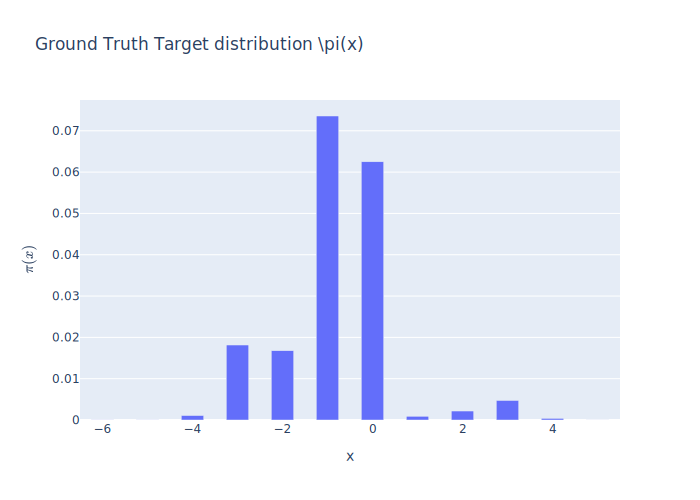

In [15]:
x = np.arange(-6,6, 1)
y = p(x)
fig1 = px.bar(x = x, y= y, title="Ground Truth Target distribution \pi(x)")
fig1.update_layout(bargap=0.5, yaxis_title="$\pi(x)$")
fig1.show()

Here are the histogram of the resulting distribution obtained with samples from MP algorithm:

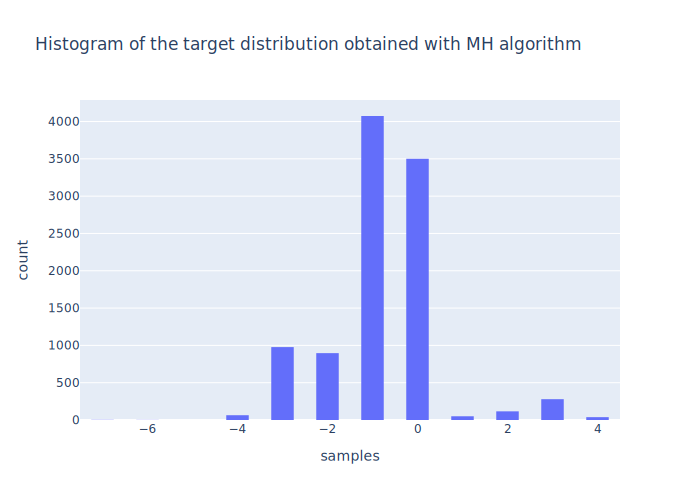

In [16]:
df = pd.DataFrame(data=samples, columns = ['samples'])
fig = px.histogram(df, x="samples", title="Histogram of the target distribution obtained with MH algorithm")
fig.update_layout(bargap=0.5)
fig.show()

It is hard to compare the similarity of separate plots above, so we present the combined figure below. Here histogram charts show the distribution obtained with MH algorithm and red dots are the ground truth distribution of $\pi(x)$. The values are showed as probabbilities:

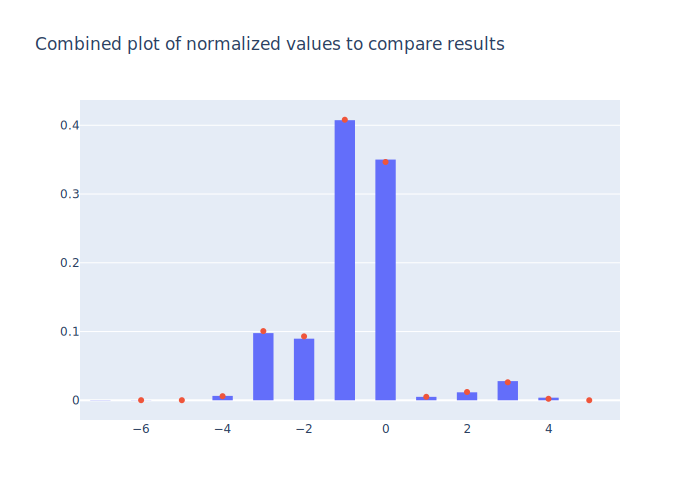

In [17]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=samples, histnorm='probability'))
fig.add_trace(go.Scatter(x=x, y=y/y.sum(), mode='markers'))
fig.update_layout(bargap=0.5, title="Combined plot of normalized values to compare results", showlegend = False)
fig.show()

#### Additionally Pyro and PyMC3 code

**Warning!** To use this code, we need to install aditional libraries, the commands for this are commented. My main solution to this question was presented above but below is are just additional work to test the capabilities of Pyro and PyMC. For this examples, Uniform distribution was used as the initialization distribution and Normal distribution was used as the proposal distribution. The reason for this is the complexity of adding custom distribution in the way suitable for those implementations. Normal distribution is continuous, so we rounded the values to the closest integer. 

Still Pyro result is pretty good:

In [18]:
!pip install pyro-ppl

In [19]:
import torch
import pyro
import pyro.distributions as dist


def metropolis_hastings(num_samples):
  # Define the model
  with pyro.plate("data", num_samples):
    # Initialize the current state and the list of samples
    current_state = pyro.sample("initial_state", dist.Uniform(-2, 2))
    samples = []

    # Iterate for the desired number of samples
    for i in range(num_samples):
      # Sample a proposed move from the proposal distribution
      proposed_move = pyro.sample("proposed_move", dist.Normal(current_state, 1))

      # Calculate the acceptance probability
      acceptance_probability = torch.min(torch.ones(1), p(proposed_move) / p(current_state))

      # Sample a uniform variable to determine whether to accept the proposed move
      u = pyro.sample("uniform_variable", dist.Uniform(0, 1))

      # If the uniform variable is less than the acceptance probability, accept the proposed move
      pyro.sample("accept_move", dist.Bernoulli(acceptance_probability), obs=u < acceptance_probability)
      current_state = pyro.deterministic("current_state",  torch.where(u < acceptance_probability, proposed_move, current_state))

      # Add the current state to the list of samples
      samples.append(current_state)

  return samples

# Sample from the model
samples = metropolis_hastings(10000)

In [20]:
print(len(samples), samples[-1].shape)

10000 torch.Size([10000])


We want to use the last trace from the sampling and as mentioned before we should round the values to closest integer:

In [21]:
samples = np.rint(samples[-1])

Here is similar combined figure as was shown previously:

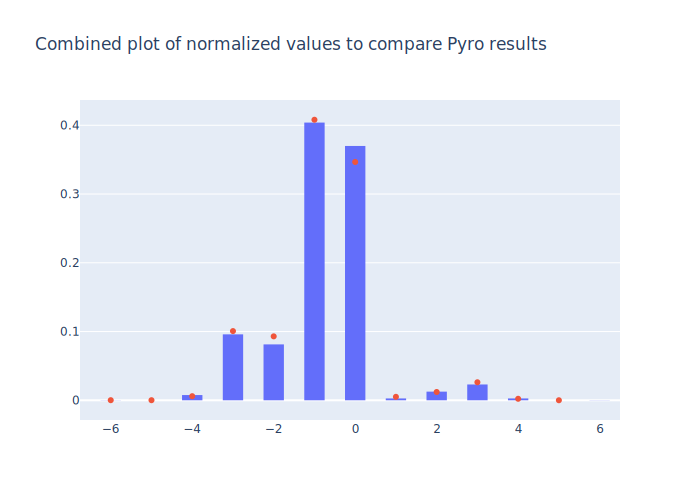

In [22]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=samples, histnorm='probability'))
fig.add_trace(go.Scatter(x=x, y=y/y.sum(), mode='markers'))
fig.update_layout(bargap=0.5, title="Combined plot of normalized values to compare Pyro results", showlegend = False)
fig.show()

Here is PYMC3 version of the code, but it works extremely slow

In [ ]:
!pip install pymc3

In [ ]:
import pymc3 as pm

In [ ]:
def metropolis_hastings(num_samples):
  # Define the model
  with pm.Model() as model:
    # Initialize the current state and the list of samples
    current_state = pm.Uniform("initial_state", lower=-2, upper=2)
    samples = []

    # Iterate for the desired number of samples
    for i in range(num_samples):
      # Sample a proposed move from the proposal distribution
      proposed_move = pm.Normal(f"proposed_move_{i}", mu=current_state, sigma=1)

      # Calculate the acceptance probability
      acceptance_probability = pm.math.minimum(1, p(proposed_move) / p(current_state))

      # Sample a uniform variable to determine whether to accept the proposed move
      u = pm.Uniform(f"uniform_variable_{i}", lower=0, upper=1)

      # If the uniform variable is less than the acceptance probability, accept the proposed move
      move_accepted = pm.Bernoulli(f"accept_move_{i}", p=acceptance_probability, observed=u < acceptance_probability)
      current_state = pm.Deterministic(f"current_state_{i}", proposed_move if move_accepted else current_state)

      # Add the current state to the list of samples
      samples.append(current_state)

  return model

# Create the model
model = metropolis_hastings(1000)

In [ ]:
# Sample from the model
trace = pm.sample(model=model, chains=1, tune=500, draws=1000)

# Question 2

## a)

### (i)

$p(x, y) = p(y_1 | x_1) * p(x_1) * p(x_2 | x_1) * p(y_2 | x_2) * ... * p(x_T | x_{T-1}) * p(y_T | x_T)$

We can equivalently write it as:

$p(x, y) = p(y_1 | x_1) * p(x_1) * Π_{t=2}^T p(x_t | x_{t-1}) * p(y_t | x_t)$

### (ii)

In this question we are asked to implement HMM as the probabilistic program. We start with the simple Python HMM class implementation which will be used to sample the sequences of hidden Markov states. In part **(ii)** the basic implementation is used but it will be modified later in the next sections.

To initialize our class HMM, we need to pass four values:
- S - number of possible values for hidden states
- T - length of the Markov chain
- pi - initial hidden states probabilities (uniform in our case)
- P - transition probability matrix where $i$-th row is the categorical distribution of $x_t$ given $x_{t-i}$ and all values in the row sum up to $1$.

Current version of the program will have method *sample* with one parameter - *size* (how many sequences we want to sample).

Every time we want to generate a sequence of $T$ values. For this we use a simple for loop wher we call the function *get_next_hidden_state*. It returns the next state based on the given current state and transition probability matrix. 

Here is the imlementation:

In [23]:
class HMM:
  def __init__(self, S, T, pi, P):
    self.S = S # number of possible states
    self.T = T # length of the sequence
    self.pi = pi # initial hidden state probabilities
    self.P = P # transition probabilities matrix

  def get_next_hidden_state(self, current_state):
    return np.random.choice(range(self.S), p=self.P[current_state]) 

  def sample(self, size):
    Xs = []
    for j in range(size):
      X = [] # hidden
      for i in range(self.T):
        if i == 0:
          X.append(np.random.choice(range(self.S), p=self.pi))
        else:
          X.append(self.get_next_hidden_state(X[i-1]))

      Xs.append(X)
      
    return Xs

We can use this program for different problems. Below is the simple concrete example where we sample $10000$ sequences of 4 elements given 3 possible hidden states and the transition probabilities matrix. This can be used for plotting the distribution of obtaining the particular sequence. 

In [24]:
S = 3
T = 4

pi = np.ones(S) / S

# Set the transition probability matrix P
P = np.array([[0.2, 0.1, 0.7],
              [0.3, 0.6, 0.1],
              [0.1, 0.8, 0.1]])

hmm = HMM(S, T, pi, P)

sequences = hmm.sample(10000)

In [25]:
sequences = np.array(sequences)
unique_sequences, counts = np.unique(sequences, return_counts=True, axis=0)

# Calculate the probability of each sequence
probabilities = counts / len(sequences)

print(len(unique_sequences))

81


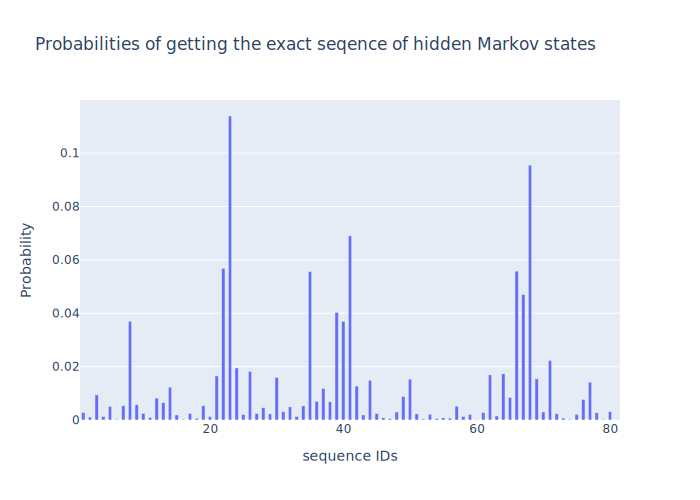

In [26]:
x = np.array(range(1, len(unique_sequences)+1))

fig1 = px.bar(x = x, y=counts/counts.sum(), title="Probabilities of getting the exact seqence of hidden Markov states")
fig1.update_layout(bargap=0.5, xaxis_title="sequence IDs", yaxis_title="Probability")
fig1.show()

In [27]:
print(f"We will get the sequence: {unique_sequences[counts.argmax()]} with the probbility p={counts[counts.argmax()]/counts.sum()}")

We will get the sequence: [0 2 1 1] with the probbility p=0.1139


#### Pyro implementation

Alternatively we can implement exactly the same probabilistic program using probabilistic programming framework Pyro:

In [28]:
import torch
import pyro
import pyro.distributions as dist

In [29]:
# Define the probabilistic program
def markov_chain(S, T, P):
  # Define the initial state as a categorical random variable
  x = pyro.sample("x", dist.Categorical(torch.ones(S) / S))

  states = [x]

  for t in range(T - 1):
    # Sample the next state from a categorical distribution,
    # with probabilities given by the transition probability matrix P
    x = pyro.sample("x_{}".format(t), dist.Categorical(P[x]))

    # Append the current state to the list of states
    states.append(x)

  return states

def sample_hmm(S, T, P, num_samples):
  chains = []

  for i in range(num_samples):
    # Generate a Markov chain by running the probabilistic program
    chain = markov_chain(S, T, P)

    chains.append(chain)

  return chains


# Set the number of possible states S and the length of the chain T
S = 3
T = 4

# Set the transition probability matrix P
P = np.array([[0.2, 0.1, 0.7],
              [0.3, 0.6, 0.1],
              [0.1, 0.8, 0.1]])

P_tensor = torch.from_numpy(P)

num_samples = 10000

sequences = sample_hmm(S, T, P_tensor, num_samples)

In [30]:
sequences = np.array(sequences)
unique_sequences, counts = np.unique(sequences, return_counts=True, axis=0)

# Calculate the probability of each sequence
probabilities = counts / len(sequences)

print(len(unique_sequences))

81


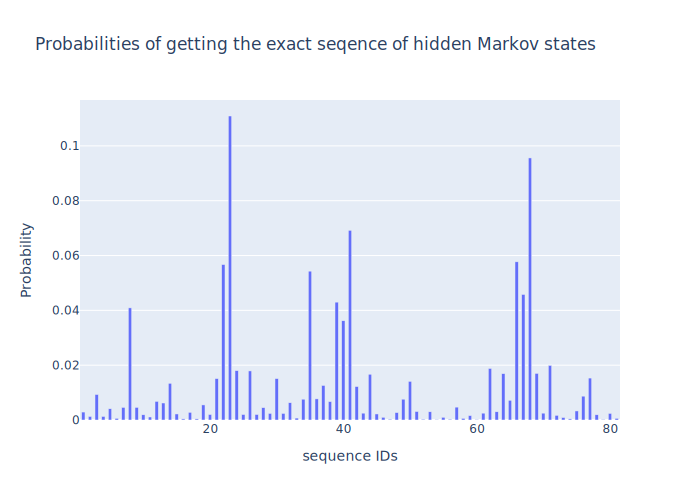

In [31]:
x = np.array(range(1, len(unique_sequences)+1))

fig1 = px.bar(x = x, y=counts/counts.sum(), title="Probabilities of getting the exact seqence of hidden Markov states")
fig1.update_layout(bargap=0.5, xaxis_title="sequence IDs", yaxis_title="Probability")
fig1.show()

### (iii)

For this task, we will modify preiously implemented class HMM. Here we add new methods to sample y values and to calculate the likelihood.

In [32]:
class HMM2(HMM):
  def __init__(self, S, T, pi, P):
    self.S = S # number of possible states
    self.T = T # length of the sequence
    self.pi = pi # initial hidden state probabilities
    self.P = P # transition probabilities matrix

  def sample_y(self, current_state):
    return np.random.normal(current_state+1, 1)

  def likelihood(self, obs_y, current_state): # weights
    return norm.pdf(obs_y, current_state, 1)

  def sample(self, size):
    Xs = []
    Ys = []
    for j in range(size):
      X = [np.random.choice(range(self.S), p=self.pi)] # hidden
      Y = [self.sample_y(X[0])] # observed

      for i in range(self.T-1):
        X.append(self.get_next_hidden_state(X[i-1]))
        Y.append(self.sample_y(X[i]))

      Xs.append(X)
      Ys.append(Y)
      
    return Xs, Ys

In [33]:
# Number of states
S = 4

# Number of observations
T = 6

pi = np.ones(S) / S

# Transition probability matrix
P = [[0.1, 0.4, 0.3, 0.2],
     [0.1, 0.1, 0.6, 0.2],
     [0.1, 0.2, 0.5, 0.2],
     [0.2, 0.3, 0.4, 0.1]]

# Observations of y
y = [0.5, 1.5, 0.9, 0, 2.5, 3]

hmm2 = HMM2(S, T, pi, P)

hidden, observed = hmm2.sample(10000)

print("First 5 samples")
print("Hidden states: ", hidden[:5])
print("Observed values: ", observed[:5])

First 5 samples
Hidden states:  [[2, 2, 2, 3, 3, 0], [2, 2, 2, 3, 3, 1], [3, 1, 2, 0, 2, 1], [0, 1, 1, 2, 3, 3], [0, 3, 3, 1, 0, 0]]
Observed values:  [[3.6087306089796134, 2.333721799128445, 2.5484468845752155, 4.0755892452811615, 2.8042907440936435, 3.7797737992636913], [2.678843085124788, 2.3305103125622426, 2.327116474363514, 3.6260723089844396, 4.570920062552041, 4.1070913718412845], [4.54012079014403, 2.3932038235555213, 1.7873385721840267, 2.9256133715641957, 1.0461128274879068, 3.057099604990413], [3.3532656392478293, 0.6271543214766939, 1.244804069725601, 1.9340734355547058, 4.2518707968110485, 4.3191743299607115], [0.6625705961851664, 2.4546328417233627, 5.317290701871922, 3.9656097376655697, 2.69939713280784, 0.6275979017369118]]


The modified program samples the sequences of hidden states based on the updated provided values of $S$, $T$ and $P$ from the task description.

### (iv)

In this part of the question we implement the third modified version of HMM. There are three main changes:
- *get_next_hidden_state* method was replaced by *get_next_hidden_state_posterior*. Our task is to find posterior distribution of $X$ given the observed values $y$. Thus the probability of choosing the next state based on current given by transition probabilities matrix $P$ is now supplemented (or affected) by the likelihood of the observed values $y$ given the hidden state $x$. For each possible next state we calculate the likelihood based on observed values. Then, transition probabilities from hidden state $x_{t-1}$ to $x_t$ are multiplied by the likelihood and normalized. In this way, we compute the updeted posterior probabilities of moving from one state to another.

- We also modified the probabilities for sampling the initial hidden state value. In the previous variant of the program it was sampled from the uniform probabilities (equal chance). Now, it is also changed by the likelihood (the same as in *get_next_hidden_state_posterior*). We are more likely to select the first hidden state as value $1$.

- The last change is the method to transform the sampled chain to the matrix $X$ of the form described in the problem. Thus, we represent matrix $X$ as having $T$ rows ans $S$ columns and every row is a one-hot vector of the corresponding sampled hidden state at time $t$.

Here is the program:

In [34]:
class HMM3(HMM2):
  def __init__(self, S, T, pi, P):
    self.S = S # number of possible states
    self.T = T # length of the sequence
    self.pi = pi # initial hidden state probabilities
    self.P = P # transition probabilities matrix

  def get_next_hidden_state_posterior(self, current_state, observed_value):
    posterior_probs = np.array([norm.pdf(observed_value, i, 1) for i in range(1, self.S+1)])
    posterior_probs = posterior_probs / posterior_probs.sum()

    posterior_next_probs = self.P[current_state] * posterior_probs
    posterior_next_probs = posterior_next_probs / posterior_next_probs.sum()

    next_state = np.random.choice(range(self.S), p=posterior_probs)
    
    return next_state

  def represent_1_hot_hidden_states(self, X):
    matrix = np.zeros((self.T, self.S))

    for row in range(self.T):
      matrix[row][X[row]] = 1

    return matrix

  def sample(self, size, observed):
    Xs = []
    Ys = []
    for j in range(size):
      posterior_initial_probs = np.array([norm.pdf(observed[0], i, 1) for i in range(1, self.S+1)])
      posterior_initial_probs = posterior_initial_probs / posterior_initial_probs.sum()
      X = [np.random.choice(range(self.S), p=posterior_initial_probs)] # hidden
      Y = [self.sample_y(X[0])] # observed

      for i in range(self.T-1):
        X.append(self.get_next_hidden_state_posterior(X[i-1], observed[i+1]))
        Y.append(self.sample_y(X[i]))

      Xs.append(self.represent_1_hot_hidden_states(X))
      Ys.append(Y)
      
    return Xs, Ys

Run sampling $10000$ times given previously defined observations $y$:

In [35]:
hmm3 = HMM3(S, T, pi, P)

hidden, observed = hmm3.sample(10000, y)

Visualize the posterior distribution similarly as previously. Here we use only $1000$ for the easier analysis of the figure:

In [40]:
sequences = np.array(hidden[:1000])
unique_sequences, counts = np.unique(sequences, return_counts=True, axis=0)

# Calculate the probability of each sequence
probabilities = counts / len(sequences)

print(len(unique_sequences))

323


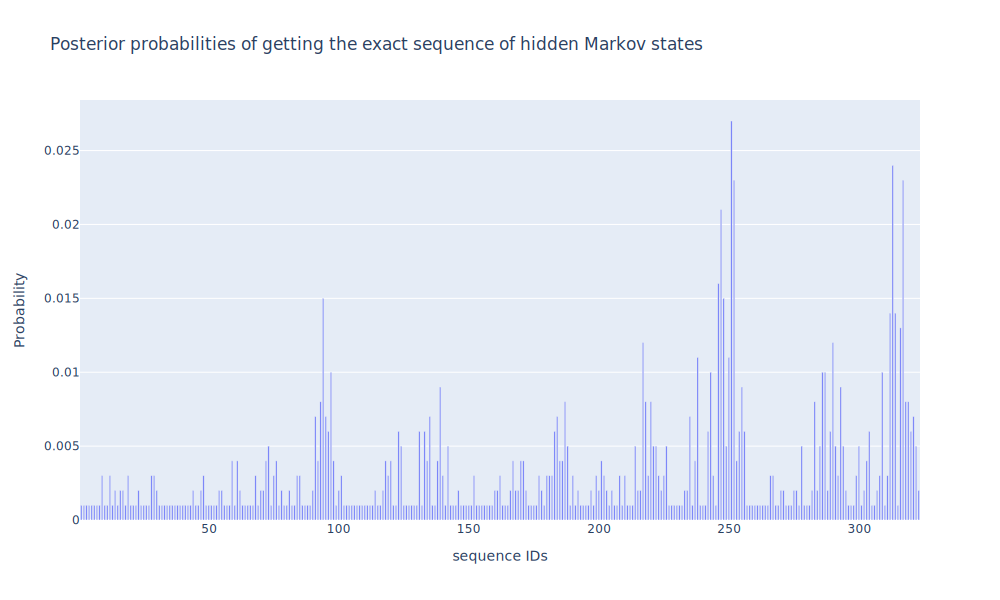

In [41]:
x = np.array(range(1, len(unique_sequences)+1))

fig1 = px.bar(x = x, y=counts/counts.sum(), title="Posterior probabilities of getting the exact sequence of hidden Markov states")
fig1.update_layout(bargap=0.5, xaxis_title="sequence IDs", yaxis_title="Probability", 
    autosize=False,
    width=1000,
    height=600)

fig1.show()

In [42]:
print(f"We will get the sequence: {unique_sequences[counts.argmax()]} with the probbility p={counts[counts.argmax()]/counts.sum()}")

We will get the sequence: [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]] with the probbility p=0.027


Here we report the posterior mean and std of the defined matrix $X$ calculated with all of the sampled sequences. We also provide additional helpful visualizations in the form of heatmap for the better visual analysis.

In [43]:
sequences.mean(0)

array([[0.696, 0.257, 0.045, 0.002],
       [0.399, 0.445, 0.135, 0.021],
       [0.63 , 0.302, 0.063, 0.005],
       [0.834, 0.154, 0.012, 0.   ],
       [0.121, 0.37 , 0.364, 0.145],
       [0.059, 0.265, 0.438, 0.238]])

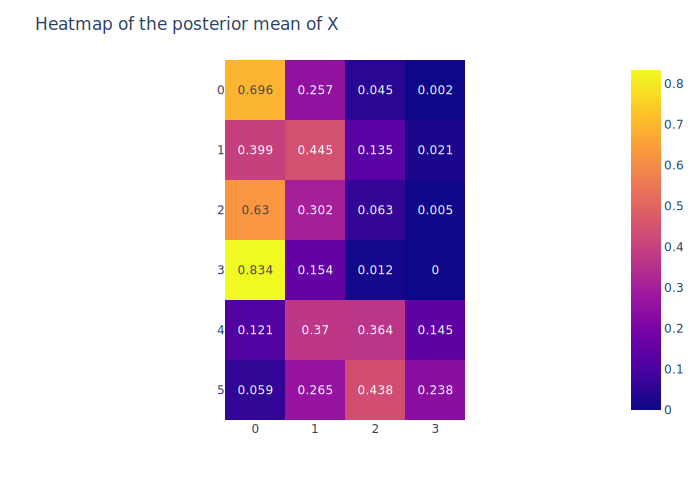

In [44]:
fig = px.imshow(sequences.mean(0), text_auto=True)
fig.update_layout(title="Heatmap of the posterior mean of X")
fig.show()

In [45]:
sequences.std(0).round(2)

array([[0.46, 0.44, 0.21, 0.04],
       [0.49, 0.5 , 0.34, 0.14],
       [0.48, 0.46, 0.24, 0.07],
       [0.37, 0.36, 0.11, 0.  ],
       [0.33, 0.48, 0.48, 0.35],
       [0.24, 0.44, 0.5 , 0.43]])

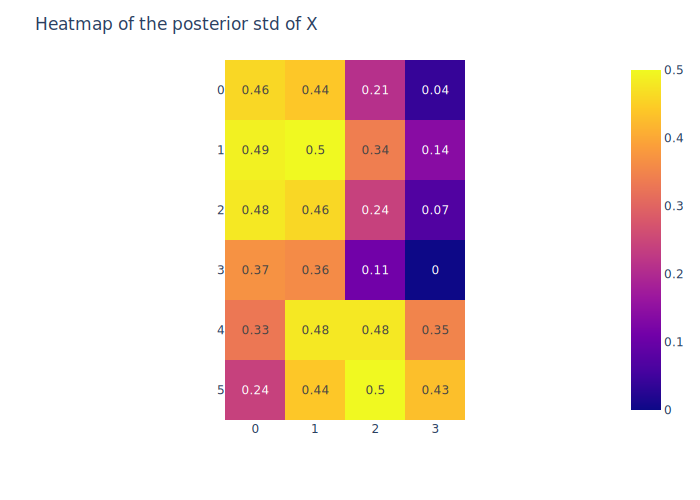

In [46]:
fig = px.imshow(sequences.std(0).round(2), text_auto=True)
fig.update_layout(title="Heatmap of the posterior std of X")
fig.show()

#### Pyro and PyStan implementations

I won't reccomend to go through this section, but would be nice to receive some suggestions on which framework is better to use.

Here are also some additional experiments with Pyro and PyStan. I do not provide the same code as implemented previously with Python, but it was interesting to play with different probabilistic programming frameworks. For Pyro, I report the program graph of hidden and observed variables. PyStan implementation will not work in Jupyter notebook, because of threads issues and it can be executed only on Linux-based systems. 

In [ ]:
!pip install pyro-ppl

In [7]:
import torch
import pyro
import pyro.distributions as dist

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


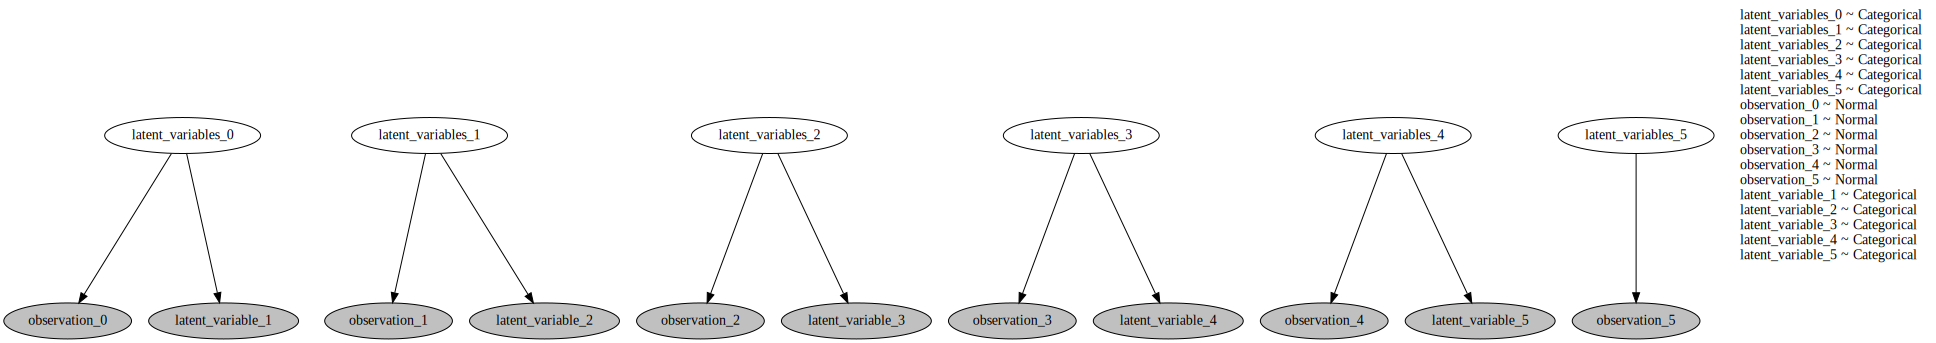

In [8]:
# Number of states
S = 4

# Number of observations
T = 6

# Transition probability matrix P
P = torch.tensor([[0.1, 0.4, 0.3, 0.2],
                  [0.1, 0.1, 0.6, 0.2],
                  [0.1, 0.2, 0.5, 0.2],
                  [0.2, 0.3, 0.4, 0.1]])

# Observations y_t
y = torch.tensor([0.5, 1.5, 0.9, 0, 2.5, 3])

# Define the probabilistic model
def hmm(y, log_gdp=None):
  # Latent variables (hidden states)
  latent_variables = [pyro.sample("latent_variables_{}".format(t), dist.Categorical(torch.ones(S) / S)) for t in range(T)]
  
  # Observations
  for t in range(T):
    pyro.sample('observation_{}'.format(t), dist.Normal(latent_variables[t], 1), obs=y[t])
  
  # Transition probabilities
  for t in range(1, T):
    pyro.sample('latent_variable_{}'.format(t), dist.Categorical(P[latent_variables[t-1]]), obs=latent_variables[t])

posterior = pyro.infer.Importance(hmm, num_samples=1000).run(y)

log_gdp = False
pyro.render_model(hmm, model_args=(y,log_gdp), render_distributions=True)

In [ ]:
!pip install pystan

In [ ]:
import stan

# Define the number of hidden states and the length of the observation sequence
S = 4
T = 6

# Define the transition matrix P
P = [[0.1, 0.4, 0.3, 0.2], 
     [0.1, 0.1, 0.6, 0.2],  
     [0.1, 0.2, 0.5, 0.2], 
     [0.2, 0.3, 0.4, 0.1]]

# Define the observation sequence y
y = [0.5, 1.5, 0.9, 0, 2.5, 3]

# Define the HMM model in PyStan
model_code = """
data {
  int<lower=1> S;    // Number of hidden states
  int<lower=1> T;    // Length of observation sequence
  real P[S,S];       // Transition matrix
  real y[T];         // Observation sequence
}
parameters {
  real x[T];         // Hidden states
}
model {
  // Define the prior distribution for the first hidden state x[1]
  x[1] ~ uniform(0,5);

  // Define the transition probabilities for x[2] to x[T]
  for (t in 2:T) {
    x[t] ~ categorical(P[x[t-1]]);
  }

  // Define the likelihood p(y_t|x_t) = N(x_t, 1)
  for (t in 1:T) {
    y[t] ~ normal(x[t], 1);
  }
}
"""
data = {"S": S, "T": T, "P": P, "y": y}

posterior = stan.build(model_code, data=data, random_seed=1)
fit = posterior.sample(num_chains=4, num_samples=10000)

In [ ]:
import asyncio
import concurrent.futures
import aiofiles as aiof

async def main():
    # Define the number of hidden states and the length of the observation sequence
    S = 4
    T = 6

    # Define the transition matrix P
    P = [[0.1, 0.4, 0.3, 0.2], 
        [0.1, 0.1, 0.6, 0.2],  
        [0.1, 0.2, 0.5, 0.2], 
        [0.2, 0.3, 0.4, 0.1]]

    # Define the observation sequence y
    y = [0.5, 1.5, 0.9, 0, 2.5, 3]

    # Define the HMM model in PyStan
    model_code = """
    data {
      int<lower=1> S;    // Number of hidden states
      int<lower=1> T;    // Length of observation sequence
      real P[S,S];       // Transition matrix
      real y[T];         // Observation sequence
    }
    parameters {
      real x[T];         // Hidden states
    }
    model {
      // Define the prior distribution for the first hidden state x[1]
      x[1] ~ uniform(0,5);

      // Define the transition probabilities for x[2] to x[T]
      for (t in 2:T) {
        x[t] ~ categorical(P[x[t-1]]);
      }

      // Define the likelihood p(y_t|x_t) = N(x_t, 1)
      for (t in 1:T) {
        y[t] ~ normal(x[t], 1);
      }
    }
    """
    data = {"S": S, "T": T, "P": P, "y": y}

    posterior = stan.build(model_code, data=data, random_seed=1)
    fit = posterior.sample(num_chains=4, num_samples=10000)
     

# create a new event loop
loop = asyncio.new_event_loop()
asyncio.set_event_loop(loop)

# run the async function in a separate thread
with concurrent.futures.ThreadPoolExecutor() as executor:
    loop.run_in_executor(executor, asyncio.run, main())

# close the loop
loop.close()


## b)

### (i)

We  write the probabilistic program based on our assumptions about the provided information. We are given the mean and standard deviation of the arrival delay. This are the statistics for all student. According to my understanding, student 1 can live on distance $D_1$ from the auditorium and student 2 on distance $D_2$ or they can live on the same distance to auditorium but can have different pace. This means, that each student will have it's own distribution of delay times which in total for all of them will give us the desired statistics of mean=$20$ and std=$2$. Thus, for two students we can have the case when the mean of the first one is close to $18$, and the mean for the second one will be close to $22$, this will give mean of $20$ as the statistic calculated for both of them. The same logic works for every student. 

Also, if it was the same student (for example previously mentioned student 1), his/her mean time will be sampled from normal distribution with mean=$20$ and std=$2$ but will not be exactly $20$, consider it to be $18$. Thus, the delay time for the first day and for the second day will be drawn from normal distribution with mean=$18$ and std=$2$, which potentially can give delay times $18$, $15$ for the first and second day respectively. In case of two different students, the idea is the same, but each student will have his/her own mean and delay times for the first and the second day will be drawn from two different normal distributions and probably have even more different values. 

We define a random variable $X$, where $X=1$ if there was the same student arriving late on both days and $X=0$ if there were two different students.
The joint probability $P(delay_1 = 16, delay_2 = 25 | X = 1)$ is the probability of observing the delays of 16 minutes and 25 minutes, given that it was the same student arriving late on both days. It will be equal to the product of separate probabilities: $P(delay_1 = 16, delay_2 = 25 | X = 1) = P(delay_1 = 16 | X = 1) * P(delay_2 = 25 | X = 1)$. For the second scenario $X=0$ the calculations are similar.

We implemented the probabilistic program *delay_simulation* to simulate the described problem. Let's describe how it works:
1. Sample the random variable representing if it was the same student (with probability $\frac{1}{3}$).

2. (Same) If it was the same student, then:

  2.1. Sample the mean $\mu_{same}$ delay time of the student from the distribution of the delay time of all students (normal with mean $20$ and std $2$).

  2.2. Sample the delay time of this student for the first day  from the normal distribution with mean=$\mu_{same}$ and std=$2$.

  2.3. Sample the delay time of this student for the second day  from the normal distribution with mean=$\mu_{same}$ and std=$2$.

  2.4. Calculate the joint probability of two sampled delays given the $\mu_{same}$ and two *sampled* delay times.

  2.5. Calculate the joint probability of two sampled delays given the $\mu_{same}$ and two *observed* delay times.

3. (Different) Instead, If there were two different students, then:

 3.1. Sample the mean $\mu_{diff, 1}$ delay time of the first student from the distribution of the delay time of all students (normal with mean $20$ and std $2$).

 3.2. Sample the mean $\mu_{diff, 2}$ delay time of the second student from the distribution of the delay time of all students (normal with mean $20$ and std $2$).

  3.3. Sample the delay time of the first student for the first day  from the normal distribution with mean=$\mu_{diff, 1}$ and std=$2$.

  3.4. Sample the delay time of the second student for the second day  from the normal distribution with mean=$\mu_{diff, 2}$ and std=$2$.

  3.5. Calculate the joint probability of two sampled delays given the $\\mu_{diff, 1}$, $\mu_{diff, 2}$ and two *sampled* delay times.

  3.6. Calculate the joint probability of two sampled delays given the $\\mu_{diff, 1}$, $\mu_{diff, 2}$ and two *observed* delay times.

4. Return sampled values (same, delay day 1, delay day 2), joint probability for sampled values, joint probability for observed values.


We designed this specific version of the probabilistic program to return two versions of the joint probability: based on drawn samples and based on observed data. The later will be useful to calculate the posterior probability.

The described program is implemented below. You can follow the comments for every important line.

In [47]:
# The mean delay time for all students
mean_delay = 20

# The standard deviation of the delay time for all students
std_delay = 2

# The observed delay times of the two students
delay_1 = 16
delay_2 = 25

# The probability that the two students are the same person, according to the given information
p_same = 1/3

def normal_pdf(x, mean, std):
  # Function to calculate PDF of the normal distribution
  # similar to scipy.norm.pdf(16, 20, 2)
  return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std)**2)

# Define delay simulation program with two scenarios
def delay_simulation(mean_delay, std_delay, delay_1_observed, delay_2_observed):
    # Sample random variable if the two students are the same person
    same = np.random.choice([1, 0], p=[1/3, 2/3])

    if same:
        # Sample the delay time of the student from a normal distribution with the given mean and standard deviation
        mean_delay_same = np.random.normal(mean_delay, std_delay)

        # Sample delay times for two days given that it was the same student with mean delay time mean_delay_same
        delay_1_same = np.random.normal(mean_delay_same, std_delay)
        delay_2_same = np.random.normal(mean_delay_same, std_delay)

        # Calculate the joint probability of the simulated delay times given that the students are the same person
        joint_probability_simulated = normal_pdf(delay_1_same, mean_delay_same, std_delay) * normal_pdf(delay_2_same, mean_delay_same, std_delay)
        
        # Calculate the joint probability of the two observed delay times given that the students are the same person
        joint_probability_observed = normal_pdf(delay_1_observed, mean_delay_same, std_delay) * normal_pdf(delay_2_observed, mean_delay_same, std_delay)
        
        return same, delay_1_same, delay_2_same, joint_probability_simulated, joint_probability_observed

    # If the two students are different people
    else:
        # Sample the delay times of the two students from a normal distribution with the given mean and standard deviation
        # If there were two different students, the mean delays are independently
        # drawn from the normal distribution with mean 20 and std 2
        # this means that the mean delay for the first student will be different from the second
        # but on avarage their delay will be 20  
        mean_delay_1_diff = np.random.normal(mean_delay, std_delay)
        mean_delay_2_diff = np.random.normal(mean_delay, std_delay)

        # Sample delay times for two days given that there were different students with each having his/her mean delay time mean_delay_1_diff and mean_delay_2_diff
        delay_1_diff = np.random.normal(mean_delay_1_diff, std_delay)
        delay_2_diff = np.random.normal(mean_delay_2_diff, std_delay)

        # Calculate the joint probability of the simulated delay times given that there were two different students
        joint_probability_simulated = normal_pdf(delay_1_diff, mean_delay_1_diff, std_delay) * normal_pdf(delay_2_diff, mean_delay_2_diff, std_delay)
        
        # Calculate the joint probability of the observed delay times given that there were two different students
        joint_probability_observed = normal_pdf(delay_1_observed, mean_delay_1_diff, std_delay) * normal_pdf(delay_2_observed, mean_delay_2_diff, std_delay)
        
        return same, delay_1_diff, delay_2_diff, joint_probability_simulated, joint_probability_observed


delay_simulation(mean_delay, std_delay, delay_1, delay_2)

(1,
 19.13561108043013,
 15.595509656121372,
 0.007003534493602914,
 0.00017770039417334526)

The modified version of this program wiil be later used for the following LMH task.

### (ii)

The LMH algorithm is a variant of the Metropolis-Hastings algorithm that is designed to be more efficient and easier to implement for probabilistic programming languages. In the original MH algorithm, the proposal transition kernel $q(k_j|k_i)$ can be difficult to construct for varying dimensionality. Moreover, the support for random variable is often unknown. Thus, we need to define a generic choice that depends only on the input of the probabilistic program.


At first let's describe the steps of the algorithm:

1. Run probabilistic program for the first time. Get the values $v_1$ (first obtained sample), $w_1$ weight of the sample and $S$ (records all the random samples that have been used thus far).

2. Sample random number $l$ from Uniform distribution from 0 to $|S_{n-1}|-1$. $R$ is a sequence of pre-determined random samples. Assign $R$ to be the prefix of $S$, $R = S[:l]$

3. Run probabilistic program with input $R$ where instead of sampling all new random variables, the portion which is in R will be reused. In other words we use the same samples as in $S_{n-1}$ for the first $l$ random variables and sample others. We obtain $v'$, $w'$ and $S'$.

4. Calculate the acceptance probability $\alpha = \frac{w' |S_{n-1}|}{w_{n-1} |S'|}$.

5. Sample random number $u$ from Uniform distribution from $0$ to $1$.

6. If $\alpha \leq u$, then $v_n = v'$, $w_n = w'$ and $S_n = S'$, else $v_n = v_{n-1}$, $w_n = w_{n-1}$ and $S_n = S_{n-1}$.

7. Repeat steps 2-7 for a **num_samples** number of iterations. The sample $v_n$ drawn at each iteration can be used to estimate the target distribution.


Let's start defining the pseudocode with the simple probabilistic program:

```
def probabilistic_program():
  x1 = sample_normal_dist()
  x2 = sample_normal_dist()

  # initialize list of the state of random variables
  S = [x1, x2]

  if condition(x1, x2) > 0:
    y = 5
  else:
    y = sample_normal_dist()

    # we add y to the states list only if it was sampled 
    S.append(y)


  # calculate the likelihood of some value conditioned on y
  # w is the weight
  w = normal_pdf(observed=4, mean=y, std=1)

  # our sample v is some manipulation of x1 and x2, for example difference
  v = manipulation(x1, x2)

  return v, w, S
```

In this program we are sampling values $v$ as some manipulation (for example the difference) of two random values drawn from normal distribution. We also calculate weight $w$ as PDF of normal distribution and save all intermediate random variables in $S$.


Now let's introduce some changes, for example we want the program to use predefined values instead of sampling them every time for this we add an input argument $R$:

```
def probabilistic_program(R=[]):
  if len(R) > 0:
     x1 = R[0]
  else:
    x1 = sample_normal_dist()
  if len(R) > 1:
    x2 = R[1]
  else:
    x2 = sample_normal_dist()


  # initialize list of the state of random variables
  S = [x1, x2]

  if condition(x1, x2) > 0:
    y = 5
  else:
    if len(R) > 2:
      y = R[2]
    else:
      y = sample_normal_dist()

    # we add y to the states list only if it was sampled 
    S.append(y)
```

Now let's define the pseudocode for the LHM itself:


```
v, w, S = probabilistic_program()

vs = [v]
ws = [w]
Ss = [S]

R = []


for i in range(10000):
  # Choose a random integer between 0 and the length of S
  l = sample_uniform(0, len(S))

  # Set R to a prefix of S, starting from 0 and ending at the chosen index l.
  R = S[:l]
  # Run the probabilistic program with the input list R
  # get new sample, weight and states
  v, w, S = probabilistic_program(R)

  # Calculate the acceptance probability as the ratio of (w * length of Ss[i]) and (ws[i] * length of S)
  a = (w * len(Ss[i])) / (ws[i] * len(S))

  # Generate a random uniform value
  u = sample_uniform(0, 1)

  # If the random uniform value is less than or equal to a,
  # append v, w, and S to the lists vs, ws, and Ss
  # Otherwise, append the previous values in vs[i], ws[i], and Ss[i] to the lists.
  if u <= a:
    vs.append(v)
    ws.append(w)
    Ss.append(S)
  else:
    vs.append(vs[i])
    ws.append(ws[i])
    Ss.append(Ss[i])
```

The main idea of LHM algorithm is to propose new candidate sample via single-site update and re-execution. In other words, the algorithm is reusing some portion (from 0 to $l$) of randomly choosen particular latent random variables from the trace and re-run the rest of the program after point $l$. To sample the execution traces we run the probabilistic program for the desired number of iterations and keep track of $v_n$, $w_n$ and $S_n$ which are either newly generated or are the same as on the previous itration $v_{n-1}$, $w_{n-1}$ and $S_{n-1}$ based on the acceptance probability. The detailed proces is described above.



One advantage of the LMH algorithm is that it is simple but can be used to successfully sample from complex distributions that are difficult to sample from using other methods. It is also relatively easy to implement and has good convergence properties, meaning that it will often produce accurate samples from the target distribution after a relatively small number of iterations. Also it solves the issue of original MG algorithm described in the first paragraph of the answer to this question (difficult to construct the proposal kernel for varying dimensionality and unknown support for random variable).

Early versions of LMH had some problems, for example reducible Markov chains, some issues arised from stochastic support. Another disadvantage of LMH is the potential performance problem for certain types of distributions, such as multimodal distributions. 

### (iii)

In [48]:
# The mean delay time for all students
mean_delay = 20

# The standard deviation of the delay time for all students
std_delay = 2

# The observed delay times
observed_delay_1 = 16
observed_delay_2 = 25

In [49]:
def run_delay(R=[]):
  if len(R) > 0:
    same = R[0]
  else: 
    same = np.random.choice([1, 0], p=[1/3, 2/3])

  if same:
    if len(R) > 1:
      mean_delay_same = R[1]
    else: 
      mean_delay_same = np.random.normal(mean_delay, std_delay)

    if len(R) > 2:
      delay_1_same = R[2]
    else:
      delay_1_same = np.random.normal(mean_delay_same, std_delay)

    if len(R) > 3:
      delay_2_same = R[3]
    else:
      delay_2_same = np.random.normal(mean_delay_same, std_delay)

    joint_prob_same = norm.pdf(observed_delay_1, mean_delay_same, std_delay) * norm.pdf(observed_delay_2, mean_delay_same, std_delay)

    w = joint_prob_same

    S = [same, mean_delay_same, delay_1_same, delay_2_same]

  else:

    if len(R) > 1:
      mean_delay_diff_1 = R[1]
    else:
      mean_delay_diff_1 = np.random.normal(mean_delay, std_delay)

    if len(R) > 2:
      mean_delay_diff_2 = R[2]
    else:
      mean_delay_diff_2 = np.random.normal(mean_delay, std_delay)

    if len(R) > 3:
      delay_1_diff = R[3]
    else:
      delay_1_diff = np.random.normal(mean_delay_diff_1, std_delay)

    if len(R) > 4:
      delay_2_diff = R[4]
    else:
      delay_2_diff = np.random.normal(mean_delay_diff_2, std_delay)

    joint_prob_diff = norm.pdf(observed_delay_1, mean_delay_diff_1, std_delay) * norm.pdf(observed_delay_2, mean_delay_diff_2, std_delay)

    w = joint_prob_diff

    S = [same, mean_delay_diff_1, mean_delay_diff_2, delay_1_diff, delay_2_diff]

  v = same

  return v, w, S

In [51]:
burnin = 10000
num_samples = 100000

v_b, w_b, S_b = run_delay()

vs_b = [v_b]
ws_b = [w_b]
Ss_b = [S_b]

R_b = []

acceptance_burnin = 0

for b in range(burnin):
  l = np.random.randint(0, len(S_b))
  R_b = S_b[:l]
  v_b, w_b, S_b = run_delay(R_b)
  
  a = (w_b * len(Ss_b[b])) / (ws_b[b] * len(S_b))

  u = np.random.uniform()

  if u <= a:
    vs_b.append(v_b)
    ws_b.append(w_b)
    Ss_b.append(S_b)

    acceptance_burnin += 1
  else:
    vs_b.append(vs_b[b])
    ws_b.append(ws_b[b])
    Ss_b.append(Ss_b[b])

print("Acceptance rate during burn-in: ", acceptance_burnin / burnin)


vs = [vs_b[-1]]
ws = [ws_b[-1]]
Ss = [Ss_b[-1]]

S = Ss[0]

R = []

acceptance = 0

for i in range(num_samples-1):

  l = np.random.randint(0, len(S))
  R = S[:l]
  v, w, S = run_delay(R)
  
  a = (w * len(Ss[i])) / (ws[i] * len(S))

  u = np.random.uniform()

  if u <= a:
    vs.append(v)
    ws.append(w)
    Ss.append(S)

    acceptance += 1
  else:
    vs.append(vs[i])
    ws.append(ws[i])
    Ss.append(Ss[i])

print("Acceptance rate: ", acceptance / (num_samples-1))

Acceptance rate during burn-in:  0.283
Acceptance rate:  0.25594255942559424


In [52]:
print("Posterior probability of being the same person: ", np.array(vs).mean())

Posterior probability of being the same person:  0.09744


If the posterior probability is significantly different from the prior probability of $\frac{1}{3}$, it indicates that the observed data has influenced our belief about the scenario. If the posterior probability is close to the prior probability, it means that the observed data hasn't had a significant influence on our belief.

Based on the results obtained with the LMH algorithm, we see that the posterior probability is close to $0.1$. This means that our prior belief of being the same student $\frac{1}{3}$ changed to $\frac{1}{10}$. We are now more sure that those were two different people. Firstly, there was a $\frac{1}{3}$ chance that there might be same person late. Then, we used the observed values of the delay time (16 minutes for the first day and 25 for the second). This scenario is more likely to happen when there were two different students late than the same. This is logical and also supported by the next plots. Given the arrival delay distribution of one student, the observed values will be "far away" on the tales. While for two different students, we can see that the distributions are shifted and distinguishable from each other, and in this case obseeved values are not so "far away" and they are more likely to happen than in the case with the same person.

In [53]:
delays_1_same = []
delays_2_same = []

delays_1_diff = []
delays_2_diff = []

for S in Ss:
  if S[0] == 1:
    delays_1_same.append(S[2])
    delays_2_same.append(S[3])
  else:
    delays_1_diff.append(S[3])
    delays_2_diff.append(S[4])

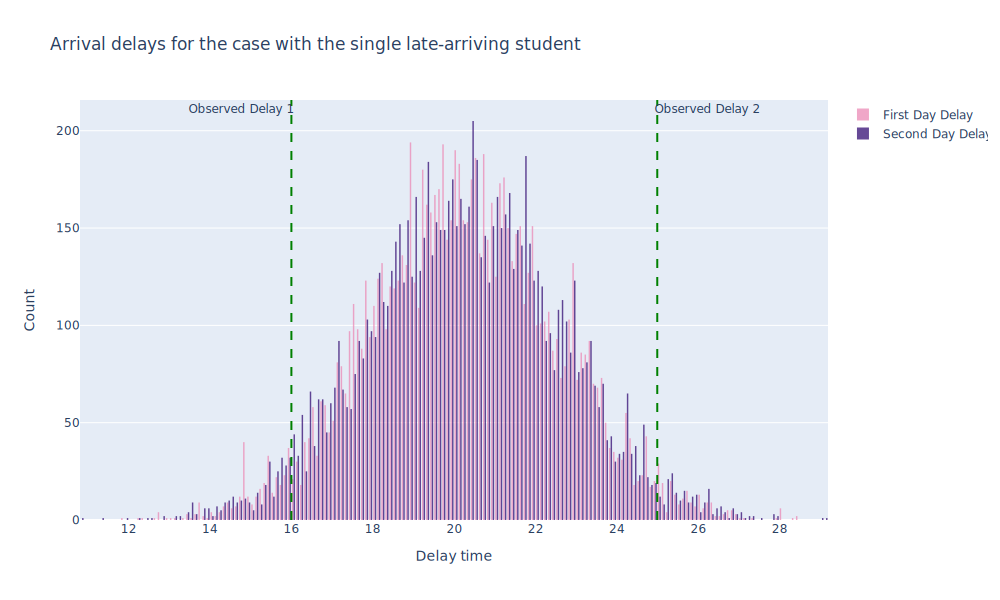

In [54]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=delays_1_same,
    name='First Day Delay', # name used in legend and hover labels

    marker_color='#EB89B5',
    opacity=0.75
))
fig.add_trace(go.Histogram(
    x=delays_2_same,
    name='Second Day Delay',
    marker_color='#330C73',
    opacity=0.75
))

fig.add_vline(x=observed_delay_1, line_dash="dash", line_color="green", annotation_text="Observed Delay 1", 
              annotation_position="top left")

fig.add_vline(x=observed_delay_2, line_dash="dash", line_color="green", annotation_text="Observed Delay 2", 
              annotation_position="top right")

fig.update_layout(
    title_text='Arrival delays for the case with the single late-arriving student', # title of plot
    xaxis_title_text='Delay time', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    autosize=False,
    width=1000,
    height=600,
)

fig.show()

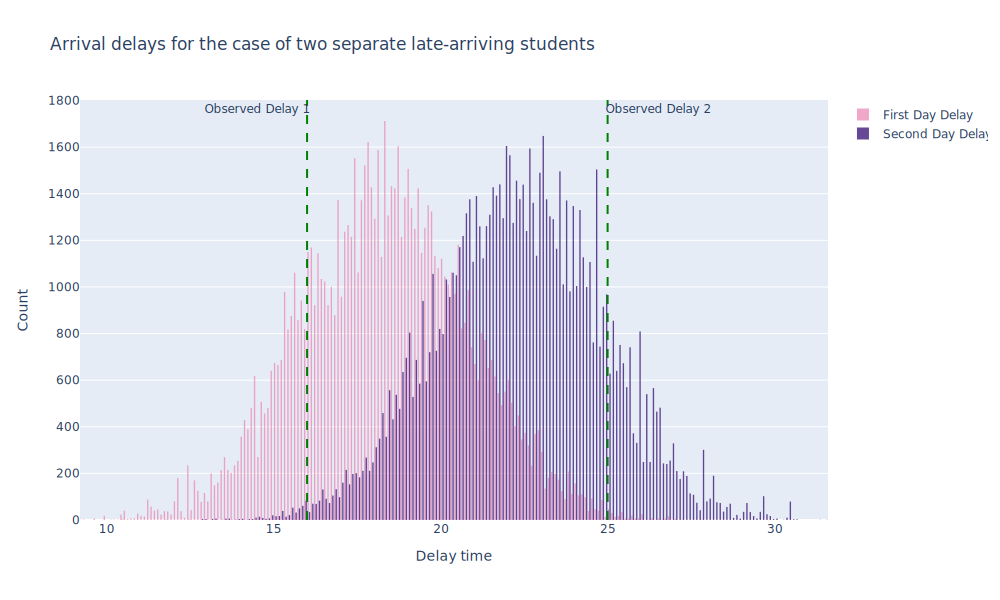

In [55]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=delays_1_diff,
    name='First Day Delay', # name used in legend and hover labels

    marker_color='#EB89B5',
    opacity=0.75
))
fig.add_trace(go.Histogram(
    x=delays_2_diff,
    name='Second Day Delay',
    marker_color='#330C73',
    opacity=0.75
))

fig.add_vline(x=observed_delay_1, line_dash="dash", line_color="green", annotation_text="Observed Delay 1", 
              annotation_position="top left")

fig.add_vline(x=observed_delay_2, line_dash="dash", line_color="green", annotation_text="Observed Delay 2", 
              annotation_position="top right")

fig.update_layout(
    title_text='Arrival delays for the case of two separate late-arriving students', # title of plot
    xaxis_title_text='Delay time', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.1, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    autosize=False,
    width=1000,
    height=600
)


fig.show()

### (iv)

A common method for estimating the lag uses autocorrelation function. We empirically compute $\operatorname{Auto}\left(X_i, X_j\right)$ for different lag values. The goal is to find the value where the autocorrelation is equal to $0$.

To define the autocorrelation function we will refer to the formula from the slides:

$\operatorname{Auto}\left(X_i, X_j\right):= \frac{\mathbb{E}\left[\left(X_i-\mu_i\right)\left(X_j-\mu_j\right)\right]}{\sigma_i \sigma_j}$

In [56]:
def autocorrelation(samples, lag, mu, sigma):
  # Calculates the autocorrelation of the samples at a given lag, mu, sigma
  
  autocorr = np.mean([(samples[t] - mu) * (samples[t+lag] - mu) for t in range(len(samples) - lag)]) / (sigma ** 2)
  
  return autocorr

In [57]:
samples = np.array(vs)

# Calculate the mean and standard deviation of the samples
mu = np.mean(samples)
sigma = np.std(samples)

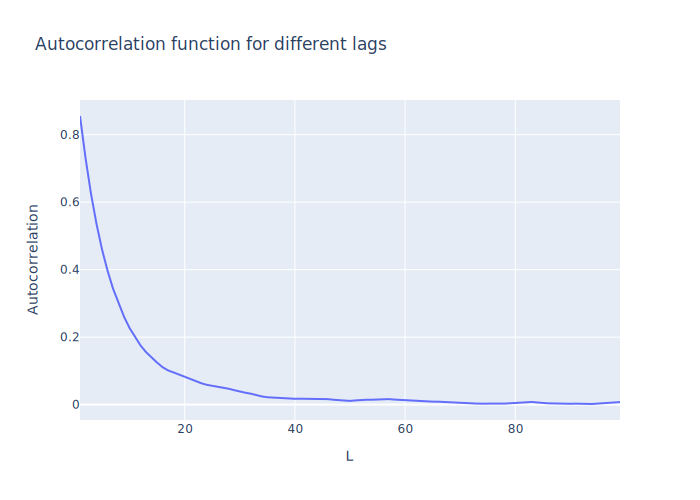

In [58]:
lags = range(1, len(samples) // 1000)
autocorrs = [autocorrelation(samples, lag, mu, sigma) for lag in lags]
fig = px.line(x = lags, y= autocorrs, title="Autocorrelation function for different lags")
fig.update_layout(
 xaxis_title_text='L', 
 yaxis_title_text='Autocorrelation'
)
fig.show()

The typical autocorrelation time is a measure of how long it takes for the autocorrelation to reach to zero (or very close to 0). It can be calculated by finding the lag value at which the autocorrelation drops below a certain threshold, such as 0.1 or 0.01.

In [59]:
def typical_autocorrelation_time(autocorrs, threshold=0.1):
  # Calculates the typical autocorrelation time of the samples
    
  # Find the first lag value at which the autocorrelation drops below the threshold
  for i, autocorr in enumerate(autocorrs):
    if np.abs(autocorr) < threshold:
      return lags[i], i
      
  # If no lag value is below the threshold, return the maximum lag value
  return lags[-1], len(lags)

In [62]:
threshold=0.01
autocorr_value, autocorr_time = typical_autocorrelation_time(autocorrs, threshold=threshold)
print(f"The autocorrelation time with threshold {threshold} for this problem is: {autocorr_time}")

The autocorrelation time with threshold 0.01 for this problem is: 62


Here we can check the same plot but with added autocorrelation time:

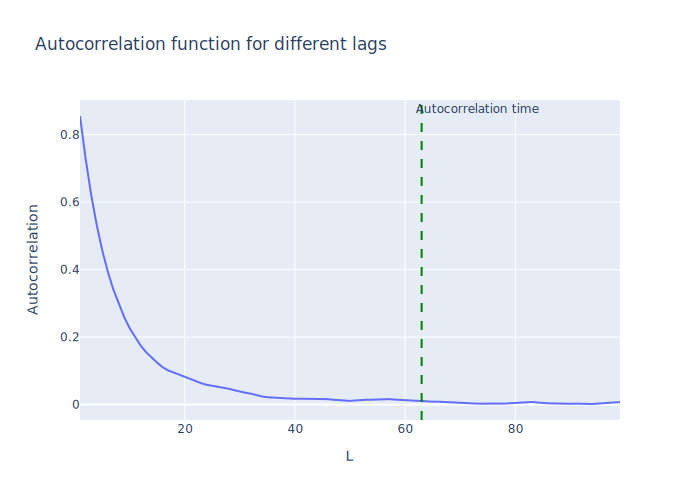

In [63]:
fig = px.line(x = lags, y= autocorrs, title="Autocorrelation function for different lags")
fig.update_layout(
 xaxis_title_text='L', 
 yaxis_title_text='Autocorrelation'
)
fig.add_vline(x=autocorr_value, line_dash="dash", line_color="green", annotation_text="Autocorrelation time", 
              annotation_position="top right")
fig.show()

Autocorrelation is important because it can be used to determine the convergence of the LMH algorithm. High autocorrelation is the indicator of correlated samples and that the algorithm has not yet converged to the posterior distribution. If the autocorrelation is low, it means that the samples are uncorrelated and the algorithm has converged (for example when autocorrelation value is lower than $0.01$ in the function above). Measuring the autocorrelation helps to determine how many samples are needed to get an accurate estimate of the posterior distribution.

In practice, the autocorrelation can be used to determine the appropriate burn-in value. This is important to discard samples that were drawn from the proposal distribution before it has converged to the posterior distribution. By measuring the autocorrelation, we can determine how many samples are needed to reach convergence and set the appropriate burn-in value.